Project Description: 

## Building the MDP:

A Markov Decision Process in a Grid World:

Consider a gridworld system with noisy dynamics which gets positive rewards $R_D, R_S$ for being in the two blue ice cream store states, and negative reward $R_W$ for being in any red road state. Formulate and solve a complete MDP problem, finding the optimal policy for a variety of task definitions.  Some questions to answer:

How would we formulate a problem that ends with a one-time (discounted) reward $R_D$ or $R_S$ whenever the system is in the respective ice cream store state as an infinite time horizon problem?  What if the reward was not discounted?
How instead would we formulate an infinite horizon, never-ending problem such that the system only achieves a reward upon entering the store rather than simply being in the store?
How many different optimal trajectories can we find by changing just the task definition ($R_D, R_S, R_W, \gamma$), each starting at the same location?
How do those trajectories / policies change as the system dynamics (error probabilities) change?
Under what conditions would it be an optimal strategy to visit both ice cream stores in the same trajectory?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
# This function computes the transition probability matrix:
def f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=0.9):
  # Inputs:
  # n = board size
  # o_v = array of obstacles
  # i_v = array of ice cream shops
  # r_v = array of roads
  # t_v = array of traps
  # p = Bernoulli probability
  # Outputs:
  # T = transition probability matrix (N_states x N_actions x N_states)
    # 1st coord = current state, 2nd coord = actions, 3rd coord = next state
  # Note: state labels start in the top left corner of the grid and increase
  # as we move right and down.
  
  N_states = n**2 # Number of states
  N_actions = 5 # Number of actions

  # Transition probability matrix:
  T = np.zeros((N_states,N_actions,N_states))

  p1 = p # Transition probability of desired actions
  p2 = (1-p1)/(N_actions - 1) # Transition probability of other actions
  pv = np.array([p1, p2, p2, p2, p2]) # Array of probabilities.
  # We will cycle through pv from right to left
  # Actions: stay, down, up, left, right

  # Loop through actions and states
  # (from state j, using action i, to state j')
  for i in np.arange(N_actions):
      for j in np.arange(N_states):
          # If we're not at an obstacle:
          if j not in o_v:
              # Stay in the same state:
              T[j,i,j] = pv[i]

          # If we're not in a trap state:
          if j not in t_v:
            # If we're not in the right column / no obstacles:
            if np.mod(j+1,n) != 0 and j not in o_v and j not in (o_v - 1):
                # Go right:
                T[j,i,j+1] = pv[np.mod(i+1,N_actions)]
            # If we're not in the left column / no obstacles:
            if np.mod(j,n) != 0 and j not in o_v and j not in (o_v + 1):
                # Go left:
                T[j,i,j-1] = pv[np.mod(i+2,N_actions)]
            # If we're not in the top row / no obstacles:
            if j > n-1 and j not in o_v and j not in (o_v + n):
                # Go up:
                T[j,i,j-n] = pv[np.mod(i+3,N_actions)]
            # If we're not in the bottom row / no obstacles:
            if j < (N_states - n) and j not in o_v and j not in (o_v - n):
                # Go down:
                T[j,i,j+n] = pv[np.mod(i+4,N_actions)]
              
            # Increase probability of staying in the same state:
            # (We're not already at an obstacle)
            # If we can't move right:
            if (np.mod(j+1,n) == 0 or j in (o_v - 1)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+1,N_actions)]
            # If we can't move left:
            if (np.mod(j,n) == 0 or j in (o_v + 1)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+2,N_actions)]
            # If we can't move up:
            if (j <= (n - 1) or j in (o_v + n)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+3,N_actions)]
            # If we can't move down:
            if (j >= (N_states - n) or j in (o_v - n)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+4,N_actions)]

          else:
            # Probabilities of escape, in each direction:
            if j+1 < n**2:
              T[j,i,j+1] = 0
            if j-1 >= 0:
              T[j,i,j-1] = 0
            if j-n > 0:
              T[j,i,j-n] = 0
            if j+n < n**2:
              T[j,i,j+n] = 0
            T[j,i,j] = 1 # Probability of remaining trapped
          
          # If we're in an obstacle or trap state, we remain in this state:
          if j in o_v or j in t_v:
            T[j,i,j] = 1
        
  return T

In [ ]:
n = 5 # Board size
p = 0.9 # Transition probability
o_v = np.array([6,7,16,17]) # Array of obstacle states
i_v = np.array([12,22]) # Array of ice cream shop states
r_v = np.array([4,9,14,19,24]) # Array of road states
t_v = np.array([])
# t_v = r_v

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix

In [ ]:
# Compute and print column sums
def f_Print_Col_Sums(T,N_actions=5):

  for i in np.arange(N_actions):
    col_sum = np.sum(T[:,i,:],axis=1)
    print(col_sum)

In [ ]:
# Check that the transition probabilities sum to 1:
def f_Check_Col_Sums(T,N_actions=5):

  for i in np.arange(N_actions):
    col_sum = np.round(np.sum(T[:,i,:],axis=1)-1,10)
    nz = np.count_nonzero(col_sum)
    if nz > 0:
      print("Error: Probabilities do not sum to 1.")

In [ ]:
f_Print_Col_Sums(T)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


<function matplotlib.pyplot.show>

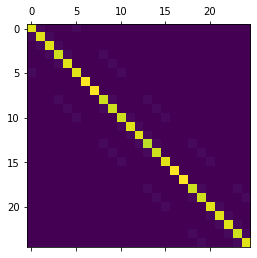

In [ ]:
# Plot the transition probability matrix:
# N_actions = 5
# for i in np.arange(N_actions):
#     plt.matshow(T[:,i,:])
# plt.show

# Plot a transition probability matrix:
plt.matshow(T[:,0,:])
plt.show

In [ ]:
# This function computes the reward matrix:
def f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n):

  N_states = n**2 # Number of states
  N_actions = 5
  R1 = np.zeros((N_states,N_actions,N_states)) # Initialize to zero
  for i in np.arange(N_actions):
      for j in np.arange(N_states):
          for c in np.arange(np.shape(i_v)[0]):
            # If we transition to ice cream shop 1:
            R1[j,i,i_v[c]] = Rpts[c] # Award Rd points
          # If we transition to the street:
          for rvi in r_v:
              R1[j,i,rvi] = Rw # Award Rw points
  # Multipy (element-wise) by a mask:
  # (Note: T>0 is the adjacency matrix corresponding to T.
  # This zeroes out the rewards for transitions that are impossible.)
  R = R1*(T>0)
  return R

In [ ]:
Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street

r_v = n*np.arange(n)+(n-1)
Rpts = np.array((Rd,Rs))
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n)

<function matplotlib.pyplot.show>

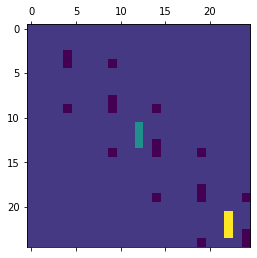

In [ ]:
# Plot the reward matrix:
plt.matshow(R[:,0,:])
plt.show

## Value Iteration:

In [ ]:
# This function performs the value iteration algorithm:
def f_Value_Iteration(n,H,T,R,gamma):
  N_states = n**2 # Number of states
  V = np.zeros(N_states) # Initialize value function

  # Value Iteration:
  for i in np.arange(H):
    a = np.sum(T*(R + gamma*V),axis=2) # Argument of Bellman equation
    A = np.argmax(a,axis=1) # Optimal action
    V = np.max(a,axis=1) # Updated value

  return A, V

In [ ]:
# Given a current state, a set of actions, and a set of transition
# probabilities, transition to a state not blocked by an obstacle.
def f_Transition(s,a,o_v,t_v,p,n,N_states,N_actions=5,rand=1):
# Inputs:
# s = current state
# a = action
# o_v = array of obstacles
# p = Bernoulli transition probability
# n = board size
# N_actions = number of actions
# rand = indicator for deterministic or Bernoulli transition
# Output:
# s = new state

  # Deterministic transition:
  if rand == 0:
    # To test the optimal policy, we can pretend the desired
    # states are always the ones to which we transition.
    rt = 0 # Always transition to desired state
  # Bernoulli transition:
  elif rand == 1:
    # Transition probabilities:
    p1 = p
    p2 = (1-p)/(N_actions-1)
    rt = np.random.choice([0,1,2,3,4],p=[p1,p2,p2,p2,p2])
    # We make the desired action with probabilty p1 and make
    # a different transition with probability p2 for each.
  act = np.mod(a + rt,N_actions) # Adding an element from [0,1,2,3,4]
  # takes us to the same state or the down, up, left, or
  # right states, respectively.

  if s not in t_v and s not in o_v:
    # If we try to move to the right and we can move to the right:
    if act == 4 and np.mod(s+1,n) != 0 and s not in (o_v - 1):
      s += 1 # Move to the right
    # If we try to move to the left and we can move to the left:
    elif act == 3 and np.mod(s,n) != 0 and s not in (o_v + 1):
      s -= 1 # Move to the left
    # If we try to move up and we can move up:
    elif act == 2 and s > (n-1) and s not in (o_v + n):
      s -= n # Move up
    # If we try to move down and we can move down:
    elif act == 1 and s < (N_states-n) and s not in (o_v - n):
      s += n # Move down
    # Else, stay in the current state.

  return s

In [ ]:
#  Given a current state, a set of actions, and a set of transition
# probabilities, transition to a state not blocked by an obstacle.
# (a second implementation)
def f_Transition2(S,s,a,T):     
# Inputs:
# S = set of all states
# s = current state
# a = current action
# T = transition probability matrix
# Output:
# s_1 = new state

  s_1 = np.random.choice(S,p=T[s,a,:]) # new state, chosen with prob from T

  return s_1

In [ ]:
# This function simulates the system with optimal policy:
def f_Simulate(o_v,t_v,n,H,s0,A,p,rand=0,N_actions=5):

  N_states = n**2 # Number of states
  s_v = np.zeros(H) # Array of states
  s = s0 # Start at initial state

  # Simulate:
  for i in np.arange(H):
    s_v[i] = s # Append the current state to an array.
    a = A[s]
    s = f_Transition(s,a,o_v,t_v,p,n,N_states,N_actions=5,rand=rand)

  return s_v

In [ ]:
# Convert from state to position on board:
def f_State_to_Matrix(s,n):
  x = int(np.floor(s/n))
  y = int(np.mod(s,n))
  return x,y

# Convert state index to x-y coordinates
def f_State_to_Position(s,n):
  x = int(np.mod(s,n)) + 0.5
  y = n - 1 - int(np.floor(s/n)) + 0.5
  return x,y

# Convert x-y coordinates to state index
def f_Pos_to_State(x,y,n):
  x = x - 0.5
  y = -(y - 0.5 - (n-1))
  s = int(n*np.round(y) + np.round(x))
  return s

In [ ]:
# This function converts the system from
# vector form to matrix form:
def f_Vector_to_Matrix(s_v,i_v,o_v,r_v,t_v,n):
# Inputs:
# s_v - an array of states
# i_v - an array of ice cream shops
# o_v - an array of obstacles
# r_v - an array of roads

# Ouputs:
# M - a matrix with 1 for ice cream shops,
# -1 for obstacles, and -2 for roads.
# Ms - a matrix with 1s for states and 0s for nonstates
# As - a matrix with 1 for right, -1 for left, n for down,
# -n for up, n+1 for final state, and 0 otherwise

  M = np.zeros((n,n)) # Matrix of goals, obstacles

  # Label the ice cream shops:
  for i in i_v:
    x,y = f_State_to_Matrix(i,n)
    M[x,y] = 1

  # Label the obstacles:
  for o in o_v:
    x,y = f_State_to_Matrix(o,n)
    M[x,y] = -1

  # Label the roads:
  for r in r_v:
    x,y = f_State_to_Matrix(r,n)
    M[x,y] = -2

  # Label the traps:
  for t in t_v:
    x,y = f_State_to_Matrix(t,n)
    M[x,y] = -3

  Ms = np.zeros((n,n)) # Matrix of states
  # Label the states:
  for s in s_v:
    x,y = f_State_to_Matrix(s,n)
    Ms[x,y] = 1

  # Compute As (matrix of actions):
  s_v1 = s_v[1:] # States, excluding the first state
  s_v1 = np.append(s_v1,0)
  # a_v is an array of actions, given by the difference between
  # states at time t+1 and at time t
  a_v = s_v1 - s_v
  a_v[np.shape(a_v)[0]-1] = n+1 # Denote last value in a_v as n+1

  As = np.zeros(n**2) # Initialize array of states
  # For each state, record the action taken at this state
  for i in np.arange(np.shape(s_v)[0]):
    As[int(s_v[i])] = a_v[i]
  As = np.reshape(As,(n,n)) # Reshape to nxn matrix

  return M, Ms, As

In [ ]:
# This function plots the sequence of states through the grid world:
def f_Plot_board(s_v,i_v,o_v,r_v,t_v,n):
    M, _, As = f_Vector_to_Matrix(s_v,i_v,o_v,r_v,t_v,n) # Convert to matrix form

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
        for j in np.arange(n):
            # Plot the ice cream shops as blue circles:
            if M.T[i,n-1-j] == 1:
                plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
            # Plot the obstacles as black squares:
            elif M.T[i,n-1-j] == -1:
                plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
            # Plot the roads as red squares:
            elif M.T[i,n-1-j] == -2:
                plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
            # Plot the traps as blue squares:
            elif M.T[i,n-1-j] == -3:
                plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
            # # Plot the states as black dots:
            # if Ms.T[i,n-1-j] == 1:
            #    plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
            # Plot the states, with arrows pointing in the direction of motion:
            if As.T[i,n-1-j] == 1: # Right
              plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\rightarrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == -1: # Left
              plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\leftarrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == n: # Down
              plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\downarrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == -n: # Up
                plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\uparrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == n+1: # Final state
                plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    major_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    plt.title("Simulated MDP")
    plt.show()

In [ ]:
# This function plots the best action to take from any state
def f_Plot_Actions(A,i_v,o_v,r_v,t_v,n):

    M, _, _ = f_Vector_to_Matrix(A,i_v,o_v,r_v,t_v,n) # Convert to matrix form
    As = np.reshape(A,(n,n))
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')

    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
      for j in np.arange(n):
        # Plot the ice cream shops as blue circles:
        if M.T[i,n-1-j] == 1:
            plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
            # plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
        # Plot the obstacles as black squares:
        elif M.T[i,n-1-j] == -1:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
        # Plot the roads as red squares:
        elif M.T[i,n-1-j] == -2:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
        # Plot the traps as blue squares:
        elif M.T[i,n-1-j] == -3:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
        # Actions: stay, down, up, left, right
        if As.T[i,n-1-j] == 0: # Stay
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 1: # Down
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\downarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 2: # Up
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\uparrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 3: # Left
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\leftarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 4: # Right
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\rightarrow$',facecolors='k', edgecolors='k')
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    major_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    plt.title("Optimal action at every state")
    plt.show()

In [ ]:
# Plots a heat map of the value function for each state
def f_Plot_Value(V,n):
  Vm = np.reshape(V, (n,n))
  plt.matshow(Vm)
  plt.title("Value function heatmap")
  plt.show

In [ ]:
# Compute T and R, run value iteration, simulate, and plot
def f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=1):

  T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
  f_Check_Col_Sums(T) # Check that probabilities sum to 1
  R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
  A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
  s_v = f_Simulate(o_v,t_v,n,H,s0,A,p,rand=rand) # Simulate the system

  f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
  f_Plot_Value(V,n) # Plot heatmap of the value function
  f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state

## Test Value Iteration:

Example: Ice Cream World

With a high transition probability, there is little chance of hitting a road, and the MDP chooses the shorter path:

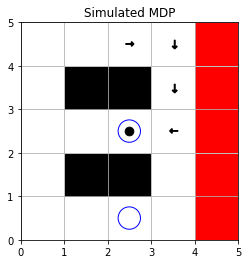

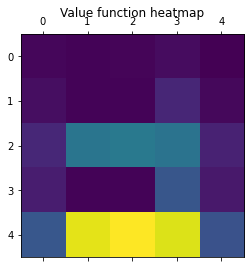

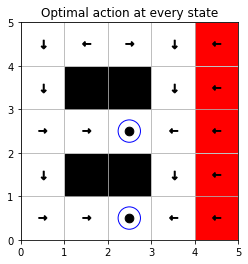

In [ ]:
n = 5 # Board size
p = 0.9 # Transition probability

s0 = 2 # Start at state 2
gamma = 0.3 # Discount factor
H = 10 # Time horizon

o_v = np.array([6,7,16,17]) # Array of obstacle states
i_v = np.array([12,22]) # Array of ice cream shop states
r_v = n*np.arange(n)+(n-1) # Array of road states
t_v = np.array([])
# t_v = r_v

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of ice cream points

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

With a lower transition probability, the MDP takes a longer path in order to avoid the road:

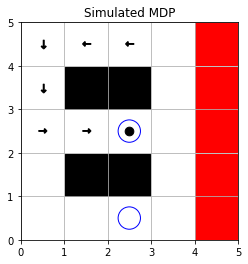

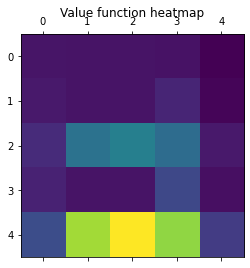

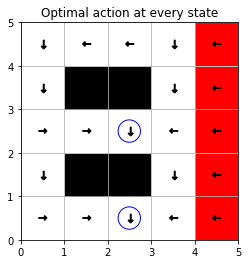

In [ ]:
n = 5 # Board size
p = 0.7 # Transition probability

s0 = 2 # Start at state 2
gamma = 0.3 # Discount factor
H = 10 # Time horizon

o_v = np.array([6,7,16,17]) # Array of obstacle states
i_v = np.array([12,22]) # Array of ice cream shop states
r_v = n*np.arange(n)+(n-1) # Array of road states
t_v = np.array([])

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of ice cream points

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

As we increase the discount factor, the MDP chooses a more distant, but more valuable target:

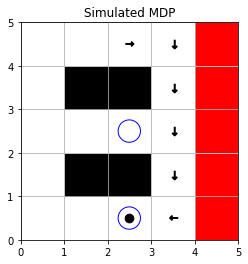

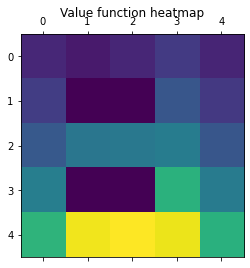

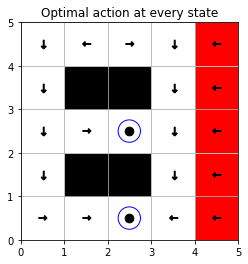

In [ ]:
n = 5 # Board size
p = 0.9 # Transition probability

s0 = 2 # Start at state 2
gamma = 0.7 # Discount factor
H = 10 # Time horizon

o_v = np.array([6,7,16,17]) # Array of obstacle states
i_v = np.array([12,22]) # Array of ice cream shop states
r_v = n*np.arange(n)+(n-1) # Array of road states

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of ice cream points

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

In [ ]:
# Create obstacles, ice cream shops, and roads
def f_Random_Board(n,s0,n_i,n_o,n_r,n_t):
  poss_states = np.setdiff1d(np.arange(n**2), s0) # Possible states
  o_v = np.random.choice(poss_states, size=n_o, replace=False) # Array of obstacle states
  poss_states = np.setdiff1d(poss_states,o_v) # Remaining possible states
  i_v = np.random.choice(poss_states, size=n_i, replace=False) # Array of ice cream shop states
  poss_states = np.setdiff1d(poss_states,i_v) # Remaining possible states
  r_v = np.random.choice(poss_states, size=n_r, replace=False) # Array of road states
  poss_states = np.setdiff1d(poss_states,r_v) # Remaining possible states
  t_v = np.random.choice(poss_states, size=n_t, replace=False) # Array of trap states
  return o_v,i_v,r_v,t_v

Example: Frozen Lake

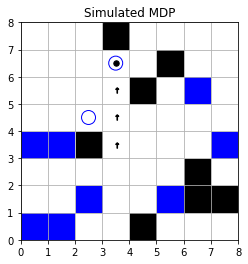

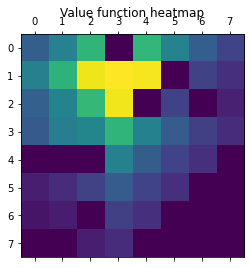

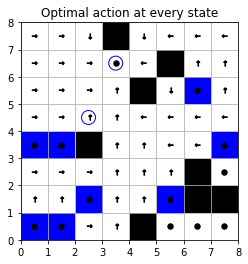

In [ ]:
n = 8 # Board size
p = 0.9 # Transition probability

gamma = 0.7 # Discount factor
H = 20 # Time horizon

s0 = np.random.choice(np.arange(n**2)) # Start at random state
n_o = n # Number of obstacle states
n_r = 0 # Number of penalty states
n_i = int(np.sqrt(n)) # Number of goal states
n_t = n
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of ice cream points

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

Example: Random World

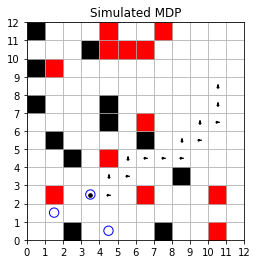

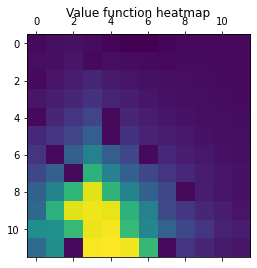

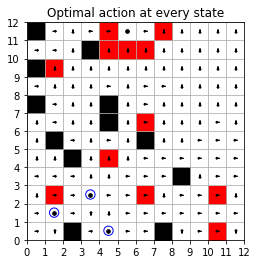

In [ ]:
n = 12 # Board size
p = 0.9 # Transition probability

gamma = 0.7 # Discount factor
H = 20 # Time horizon

s0 = np.random.choice(np.arange(n**2)) # Start at random state
n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = int(np.sqrt(n)) # Number of goal states
n_t = 0 # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rw = -1 # Reward for street
Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

Example: Maze World

In [ ]:
# Make a random maze
def f_maze(N_states,o_v,t_v,p,n):
  maze = np.array([])
  poss_states = np.arange(N_states)

  # Create a maze:
  # https://en.wikipedia.org/wiki/Maze_generation_algorithm
  # (It doesn't work well.)
  for i in np.arange(N_states/2):
    s = np.random.choice(poss_states)
    poss_states = np.setdiff1d(poss_states, s) # Possible states
    maze = np.append(maze,s)
    a = np.random.choice(np.arange(4)+1)
    s = f_Transition(s,a,o_v,t_v,p,n,N_states,rand=0)
    maze = np.append(maze,s)

  maze = maze.astype(int)
  o_v = np.setdiff1d(np.arange(N_states), maze)
  i_v = np.array([np.random.choice(maze)]) # Random goal state
  maze = np.setdiff1d(maze, i_v)

  return maze, o_v, i_v

In [ ]:
# Make a random maze
def make_maze(n, spar, tunnelX, tunnelY):
  maze = np.array([])
  poss_states = np.arange(n**2)
  breakPt = (100-spar)/2
  for y in np.arange(0,n,2):
    for x in np.arange(0,n,2):
      s = n*y + x
      val = np.random.randint(100)
      # print(x,y,s, val<=breakPt, val > breakPt and val<=2*breakPt, val> 2*breakPt)

      if val <= breakPt:  #vetical Wall
        if (y != 0 and val < tunnelY*breakPt ) or y >n-3:
          # print('tunnel')
          pathArray = np.array([s-n, s, s+n])
        else:
          pathArray = np.array([ s, s+n]) 
      elif (val > breakPt and val <= breakPt*2):  #horizontal Wall
        if (x != 0 and (val-breakPt) < tunnelX*breakPt )or x > n-3:
          # print('tunnel')
          pathArray = np.array([s-1, s, s+1])
        else:
          pathArray = np.array([s, s+1])
      else: #add nothing
        pathArray = np.array([s-n, s-1, s, s+1, s+n, s+n+1])
      maze = np.append(maze, pathArray)

  maze = maze.astype(int)
  o_v = np.setdiff1d(np.arange(N_states), maze)
  i_v = np.array([np.random.choice(maze)]) # Random goal state
  maze = np.setdiff1d(maze, i_v)

  return maze, o_v, i_v

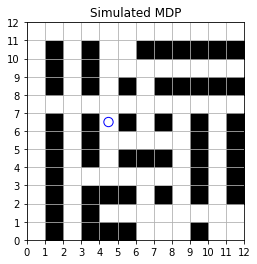

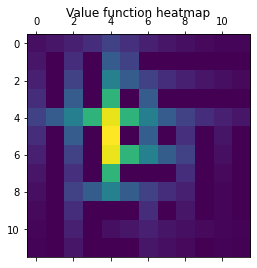

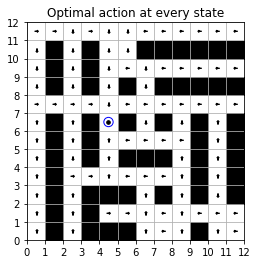

In [ ]:
n = 12 # Board size
p = 0.9 # Transition probability

N_states = n**2
gamma = 0.7 # Discount factor
H = 20 # Time horizon

Rw = -1 # Reward for street
Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

n_r =  0 # Number of penalty states
# n_i = 1 # Number of goal states
n_t = 0 # Number of trap states

# maze, o_v, i_v = f_maze(N_states,o_v,t_v,p,n)
# s0 = int(np.random.choice(maze)) # Start at random state

# Making our maze
spar = 10 # sparseness Factor % (amount of white space)
tunnelX = 1.0
tunnelY = 1.0
maze, o_v, i_v = make_maze(n,spar,tunnelX,tunnelY)

r_v = np.random.choice(maze,size=n_r) # Start at random state
t_v = np.random.choice(maze,size=n_r) # Start at random state

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

## Bayes Filter:

Now, let's say the only feedback we get from the system is the smell of ice cream---that is, we can sense our distance to the ice cream shops.  The measurement value (output/observation) $o$ is related to the harmonic mean $h$ of the (Euclidean) distances to each of the two ice cream shops $d_{D}, d_{S}$: 

$$ 
h = \frac{2}{d_D^{-1} + d_S^{-1}}
$$

$$
o = \begin{cases}
  \lceil h \rceil & \mathrm{w.p.} \quad 1 - (\lceil h \rceil - h ) \\ 
  \lfloor h \rfloor & \mathrm{w.p.} \quad \lceil h \rceil - h 
\end{cases}
$$

Create a Bayes filter on this system and run several examples, displaying the belief state over time as the system executes a series of actions from both known and unknown initial states.

In [ ]:
# Compute harmonic mean of distances to the ice cream shops:
def f_Harmonic_Mean_Distance(s,i_v,n):
  x,y = f_State_to_Matrix(s,n) # Get x, y position
  denom = 0
  # Loop through array of ice cream shops:
  for i in i_v:
    xi,yi = f_State_to_Matrix(i,n) # Ice cream position
    dist = np.sqrt((x-xi)**2 + (y-yi)**2) # Distance
    if dist > 0:
      denom += 1/dist # Add 1/dist to denominator
  # If the sum of 1/distances = 0, the harmonic mean = 0
  if denom == 0:
    hm = 0
  # Else, compute harmonic mean
  else:
    hm = np.shape(i_v)[0]/denom
  return hm

In [ ]:
# Compute observation:
def f_Observation(h):
  # Map the harmonic mean h to ceil(h) or floor(h) with probabilities
  # 1 - (ceil(h) - h) and ceil(h) - h, respectively.
  p2 = np.ceil(h) - h
  p1 = 1 - p2
  return np.random.choice((np.ceil(h),np.floor(h)),p=(p1,p2))

In [ ]:
# Returns the probability of an observation o given a state s:
def f_Pr_o_given_s(o,s,i_v,n):
  h = f_Harmonic_Mean_Distance(s,i_v,n) # Mean distance
  # Probabilities of each observation:
  p2 = np.ceil(h)-h
  p1 = 1-p2
  # Pr(ceil(h)|h) = p1
  if o == np.ceil(h):
    pr = p1
  # Pr(floor(h)|h) = p2
  elif o == np.floor(h):
    pr = p2
  # Otherwise, # Pr(o|h(s)) = 0
  else:
    pr = 0
  return pr

In [ ]:
# Update the a priori belief state:
def f_Belief_minus(a,S,T,n,Belief_plus):
  Belief_minus = np.zeros(n**2)
  # T[:,a,:] = transition probability matrix given an action a
  # Matrix product gives the new belief state
  Belief_minus += np.matmul(T[:,a,:],Belief_plus)
  # Note: Belief_minus should already be normalized
  return Belief_minus/sum(Belief_minus)

In [ ]:
# Update the a posteriori belief state:
def f_Belief_plus(o,s,i_v,S,n,Belief_minus):
  pr = np.zeros(n**2)
  for s in S:
    pr[s] = f_Pr_o_given_s(o,s,i_v,n)
  numerator = pr*Belief_minus
  return numerator/sum(numerator)

In [ ]:
# This function simulates the system with Bayes filter and
# the policy found by value iteration.
def f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v,N_actions=5,rand=0):

  N_states = n**2 # Number of states
  s_v = np.zeros(H) # Initialize array of states
  s_est_v = np.zeros(H) # Initialize array of estimated states
  s = s0 # Start at initial state
  Belief_plus = Belief_0 # Initialize belief state
  S = np.arange(n**2)

  # Simulate:
  for i in np.arange(H):
    s_v[i] = s # Append the current state to an array.
    s_est = np.argmax(Belief_plus) # Estimated state
    s_est_v[i] = s_est # Append the estimated state to array
    a = A[s_est] # Take action using estimated state
    s = f_Transition(s,a,o_v,t_v,p,n,N_states,rand=rand) # Transition to new state
    Belief_minus = f_Belief_minus(a,S,T,n,Belief_plus) # Belief minus
    h = f_Harmonic_Mean_Distance(s,i_v,n) # Harmonic mean distance
    o = f_Observation(h) # Observation
    Belief_plus = f_Belief_plus(o,s,i_v,S,n,Belief_minus) # Belief plus

  return s_v, s_est_v

In [ ]:
# Plot state and estimated states vs time step
def f_Plot_states(s_v,s_est_v):
  plt.plot(s_v,label="Actual state")
  plt.plot(s_est_v,linestyle="--",label="Estimated state")
  plt.xlabel('Time step')
  plt.ylabel('State')
  plt.grid()
  plt.legend()
  plt.show()

Test the Bayes Filter:

Example: Two goal states and known initial state:

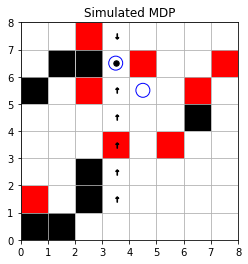

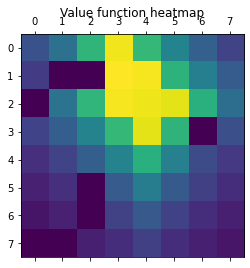

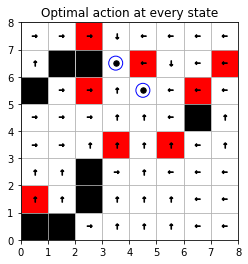

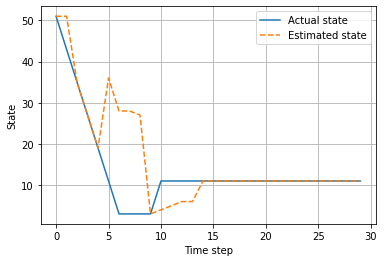

In [ ]:
n = 8 # Board size
p = 0.9 # Transition probability

gamma = 0.7 # Discount factor
H = 30 # Time horizon

s0 = np.random.choice(np.arange(n**2)) # Start at random state
n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 2
n_t = 0 # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rs,Rs)) # Array of ice cream points

# Initialize the belief state:
Belief_0 = np.zeros(n**2) #
Belief_0[s0] += 1 # We know we're starting from s0

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
s_v, s_est_v = f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v) # Simulate the system

f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
f_Plot_Value(V,n) # Plot heatmap of the value function
f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state
f_Plot_states(s_v,s_est_v) # Plot states vs time step

Example: Single goal state and a decent guess of the initial state:

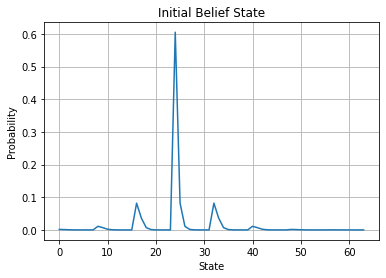

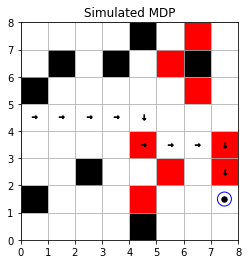

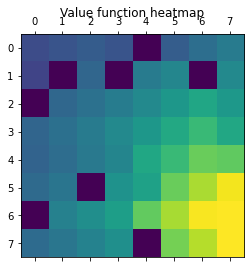

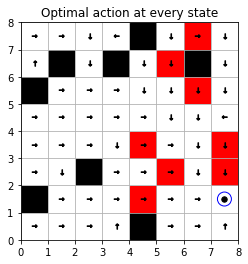

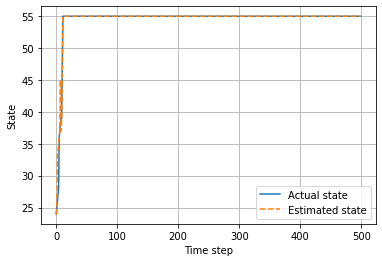

In [ ]:
n = 8 # Board size
p = 0.9 # Transition probability

gamma = 0.9 # Discount factor
H = 500 # Time horizon

s0 = np.random.choice(np.arange(n**2)) # Start at random state

# Initialize the belief state:
Belief_0 = np.zeros(n**2)
for s in np.arange(n**2):
  Belief_0[s] = np.exp(-2*f_Harmonic_Mean_Distance(s,np.array([s0]),n))
Belief_0 = Belief_0/np.sum(Belief_0) # Normalize to 1

plt.plot(Belief_0)
plt.title('Initial Belief State')
plt.xlabel('State')
plt.ylabel('Probability')
plt.grid()
plt.show()

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 1
n_t = 0 # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rw = -1 # Reward for street
Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
s_v, s_est_v = f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v) # Simulate the system

f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
f_Plot_Value(V,n) # Plot heatmap of the value function
f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state
f_Plot_states(s_v,s_est_v) # Plot states vs time step

Example: Larger Board

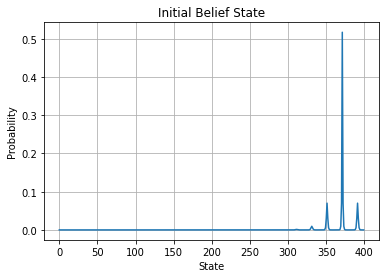

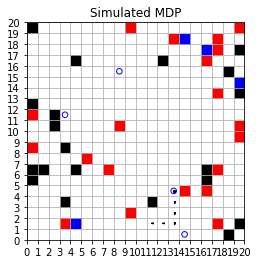

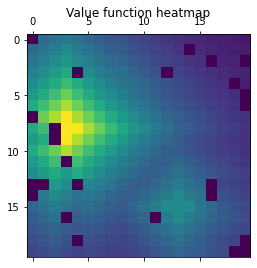

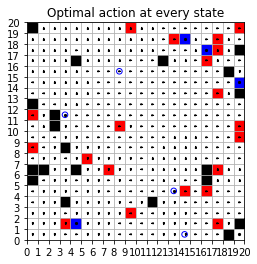

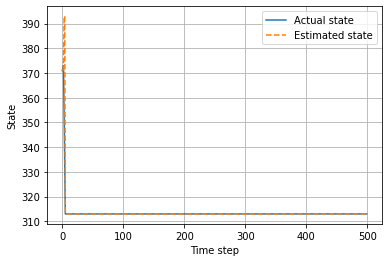

In [ ]:
n = 20 # Board size
p = 0.9 # Transition probability

gamma = 0.9 # Discount factor
H = 500 # Time horizon

s0 = np.random.choice(np.arange(n**2)) # Start at random state

# Initialize the belief state:
Belief_0 = np.zeros(n**2)
for s in np.arange(n**2):
  Belief_0[s] = np.exp(-2*f_Harmonic_Mean_Distance(s,np.array([s0]),n))
Belief_0 = Belief_0/np.sum(Belief_0) # Normalize to 1

plt.plot(Belief_0)
plt.title('Initial Belief State')
plt.xlabel('State')
plt.ylabel('Probability')
plt.grid()
plt.show()

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = int(np.sqrt(n)) # Number of goal states
n_t = int(np.sqrt(n)) # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rw = -1 # Reward for street
Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
s_v, s_est_v = f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v) # Simulate the system

f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
f_Plot_Value(V,n) # Plot heatmap of the value function
f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state
f_Plot_states(s_v,s_est_v) # Plot states vs time step

## Q-Learning

In [ ]:
# Q-learning
def f_Q_Learning(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=1):

  Q_v = np.zeros((N_s,N_a)) # Initialize Q_v

  num_it = 0 # Number of iterations
  num_ep = 0 # Number of episodes
  dQ_norm = 1
  dQ_norm_v = np.array([])

  # Loop over episodes:
  for i in np.arange(N_e):
  # while dQ_norm > 1e-4:
    num_ep += 1 # Increment the episode counter
    if rand_start == 0:
      s = s0 # Always start from initial state
    else:
      s = np.random.choice(S) # Start from random state

    # Loop over steps in trajectory:
    for j in np.arange(N_t):
      num_it += 1 # Increment the iteration counter

      # Epsilon-greedy strategy:
      rand = np.random.choice((0,1),p=(eps,1-eps))
      # Explore:
      if rand == 0:
        a = np.random.choice(5) # Random action
      # Exploit:
      else:
        a = np.argmax(Q_v[s,:]) # Best action using current Q

      # Transition to new state:
      s_1 = f_Transition2(S,s,a,T)

      # Value iteration update:
      dQ1 = alpha*(R[s,a,s_1] + gamma*np.max(Q_v[s_1,:]) - Q_v[s,a])
      Q_v[s,a] += dQ1

      s = s_1 # Update state

    # Check for convergence:
    if np.mod(num_ep,n_epoch+1) == 0:
      Q_hat = Q_v.copy()
    if num_ep > n_epoch and np.mod(num_ep,n_epoch) == 0:
      dQ = Q_hat - Q_v
      dQ_norm = np.absolute(dQ).max()
      dQ_norm_v = np.append(dQ_norm_v,dQ_norm)
      if dQ_norm < tol:
        break

  Q = np.reshape(Q_v,(n,n,N_a))
  V_Q = np.max(Q,axis=2)
  A_Q = np.argmax(Q_v,axis=1)

  print("Number of episodes: ", num_ep)
  print("Number of iterations: ", num_it)

  return Q, V_Q, A_Q, dQ_norm_v

In [ ]:
# Plot loss function
def f_Plot_Loss(dQ_norm_v):
  plt.plot(dQ_norm_v)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

Test Q-learning:

Number of episodes:  2050
Number of iterations:  205000


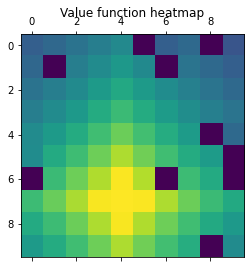

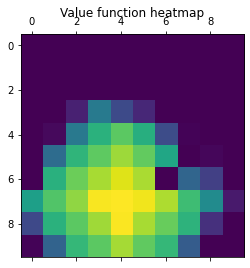

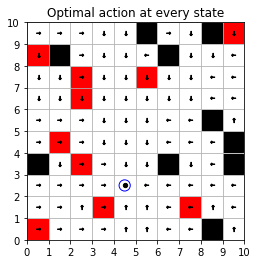

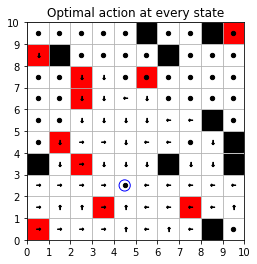

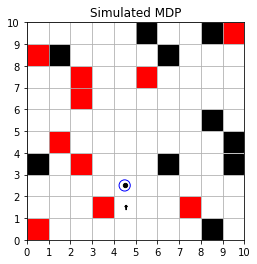

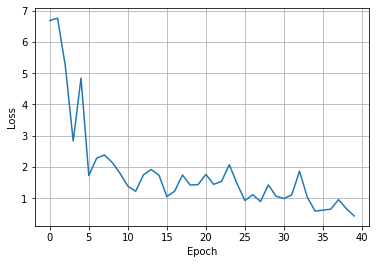

In [ ]:
n = 10 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
S = np.arange(N_s) # Set of possible states
p1 = 0.9 # Transition probability
p2 = (1-p1)/(N_a-1)
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 2500 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 0.5 # Break when loss < tol
s0 = np.random.choice(S) # Starting state

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of rewards

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix

# Q-learning:
Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=0)

H = 100 # Horizon in value iteration
A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
s_v = f_Simulate(o_v,t_v,n,H,s0,A_Q,p,rand=0) # Simulate the system using Q-learning

f_Plot_Value(V,n) # Plot heatmap of the value function generated by value iteration
f_Plot_Value(V_Q,n) # Plot heatmap of the value function generated by Q-learning
f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action using value iteration
f_Plot_Actions(A_Q,i_v,o_v,r_v,t_v,n) # Plot the best action using Q-learning
f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
f_Plot_Loss(dQ_norm_v) # Plot loss function

## Deep Q-learning

In [ ]:
import numpy as np
import math
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Create toy data

# The neural network will take the state as input and output Q_hat[s,a]
# Inputs: (s, a) or (x, y, a)
# Output: Q_hat[s,a]

n = 5 # Board dimension
N_states = n**2
N_actions = 5
train_sz = 10*N_states # Number of samples in training dataset
train_batch_sz = 10 # Size of training batch

# Create sinusoidal training data:
data_range = 15
x1 = (np.random.uniform(0,data_range, size=(data_range*100, 1)))-data_range/2
# x2 = 2*x1 + 3
# x3 = np.log(x1) - x2
# train1 = np.concatenate((x1,x2,x3))
# train2 = np.reshape(train1,(train_sz,3))

# Create training labels:
frq = 2
y = np.sin(frq*x1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Convert to torch tensors:
train_data= torch.from_numpy(x1).float().to(device)
train_labels = torch.from_numpy(y).float().to(device)
# train_data = torch.Tensor(train2).to(device) # as torch.float32
# labels = np.reshape(labels1,(train_sz,1))
# train_labels = torch.Tensor(labels)

# Create dataset from tensors with matching first dimension
# Samples will be drawn from the first dimension
train_dataset = TensorDataset(train_data, train_labels)

# Create a data loader from the dataset
# Type of sampling and batch size are specified at this step
train_loader = DataLoader(train_dataset, batch_size=train_batch_sz, shuffle=False)

# Create an iterator on the training loader
# (this is just to test the size of x_train and y_train)
cur_x, cur_y = next(iter(train_loader))
print(cur_x.size()) # x_train for current iteration
print(cur_y.size()) # y_train for current iteration

# variables for plotting results
res = 10
x_axis = (np.arange(data_range*res)-data_range/2*res).reshape(data_range*res,1)/res
x_axis_torch = torch.from_numpy(x_axis).float().to(device)

torch.Size([10, 1])
torch.Size([10, 1])


In [ ]:
# train1 = np.concatenate((traina,trainb,trainc))
# train2 = np.reshape(train1,(3,train_sz)).T
# plt.plot(train2[:,0])
# plt.plot(train2[:,1])
# plt.plot(train2[:,2])
# plt.show()

In [ ]:
# Fully-connected network:
class fc_net(torch.nn.Module):
# Network Structure:
# Fully Connected -> ReLu -> Fully Connected -> Linear

  # Initialize the network and specify input/output dimensions:
  def __init__(self, num_in, num_out, w1, w2):
    super(fc_net, self).__init__()
    self.h1 = torch.nn.Linear(in_features=num_in, out_features=w1)  # Fully-connected layer
    self.h2 = torch.nn.Linear(in_features=w2, out_features=1) # Fully-connected layer
  
  # Build the network:
  def forward(self, inputs):
    a1 = F.relu(self.h1(inputs)) # ReLu activation
    a2 = self.h2(a1) # Linear activation
    # a2 = F.sigmoid(self.h2(a1),dim=-1) # Sigmoid activation
    return a2

In [ ]:
# Train the model:
def train(model,loss,train_loader,optimizer,epoch):
  model.train()
  # print('Train Epoch: ', epoch)
  for batch_idx, (cur_x, cur_y) in enumerate(train_loader):

    optimizer.zero_grad() # Zero out gradients
    output = model.forward(cur_x) # Propagate forward through network
    cur_loss = loss(output, cur_y) # Compute loss at current iteration
    cur_loss.backward() # Backprop
    optimizer.step() # Step of optimizer
    losses.append(cur_loss)
    
    # if np.mod(batch_idx+1,it) == 0:
    #   print('Iteration: ', batch_idx+1, ' Loss: ', round(cur_loss.item(),5))

In [ ]:
# # Test the model:
# def test(model,loss,test_loader):
#   model.eval()
  
#   test_loss = 0
#   with torch.no_grad():
#     for batch_idx, (cur_x, cur_y) in enumerate(test_loader):
#       output = model.forward(cur_x) # Neural net output
#       test_loss = loss(output, cur_y) # Testing loss

#     test_loss /= len(test_loader.dataset)
#     print('Average testing loss: ', format(test_loss.item(),"10.2E"))

#     return test_loss

In [ ]:
# Plot the loss:
def f_Plot_loss(losses):
  plt.plot(losses, '-', color = "black")
  plt.title('Training Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

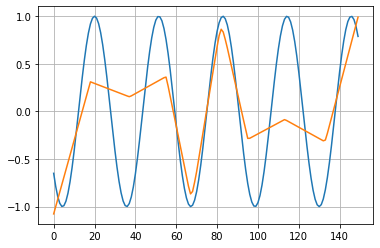

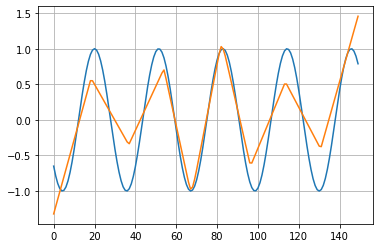

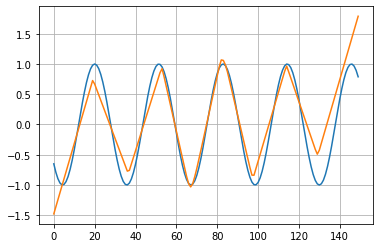

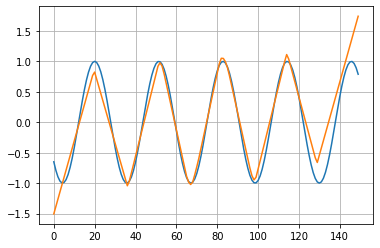

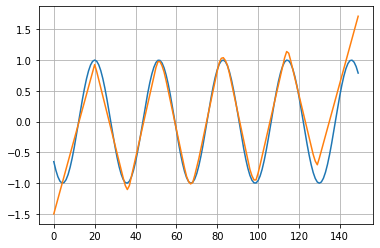

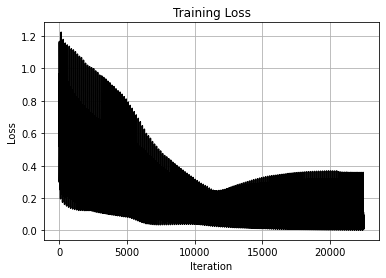

In [ ]:
lr = 2e-3 # Learning rate
n_epochs = 150 # Number of training epochs
plot_every = n_epochs/5 # Plot five times

num_in = 1 # Dimension of input
num_out = 1 # Dimension of output

w1 = 200 # Width of hidden layer 1
w2 = 200 # Width of hidden layer 2

losses = [] # Array of training losses

model = fc_net(num_in, num_out, w1, w2).to(device)
loss = nn.MSELoss(reduction='mean') # Mean squared error loss
# opt = torch.optim.SGD(model.parameters(), lr=lr) # SGD
# opt = torch.optim.SGD(model.parameters(), lr=lr), momentum=0.4) # SGD with momentum
opt = torch.optim.Adam(model.parameters(), lr=lr) # Adam

for epoch in np.arange(n_epochs)+1:
  train(model,loss,train_loader,opt,epoch)

  if (epoch % plot_every) == 0:
    labels = (np.sin(frq*x_axis_torch.cpu())).detach().numpy()
    labels_hat = model(x_axis_torch).cpu().detach().numpy()

    plt.plot(labels)
    plt.plot(labels_hat)
    plt.grid()
    plt.show()

f_Plot_loss(losses)

## RRT & RRT*

In [ ]:
# This function plots the goal, obstacle, penalty, trap, and start states:
def f_Plot_gopts(i_v,o_v,r_v,t_v,n):
    M, Ms, As = f_Vector_to_Matrix(np.array([s0]),i_v,o_v,r_v,t_v,n) # Convert to matrix form

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
      for j in np.arange(n):
        # Plot the ice cream shops as blue circles:
        if M.T[i,n-1-j] == 1:
            plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
        # Plot the obstacles as black squares:
        elif M.T[i,n-1-j] == -1:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
        # Plot the roads as red squares:
        elif M.T[i,n-1-j] == -2:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
        # Plot the traps as blue squares:
        elif M.T[i,n-1-j] == -3:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
        # Plot the starting state with an x:
        if Ms.T[i,n-1-j] == 1:
            plt.scatter(i+0.5,j+0.5,s=400*(5/n)**2,marker="x",facecolors='k', edgecolors='k')
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    major_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')

In [ ]:
# Compute the distance between two states:
def f_Dist(v_new,v,dmode):
  x,y = f_State_to_Matrix(v_new,n)
  xv,yv = f_State_to_Matrix(v,n)
  # x,y = f_State_to_Position(v_new,n)
  # xv,yv = f_State_to_Position(v,n)
  # Euclidean norm
  if dmode == 2:
    d = np.sqrt((x-xv)**2 + (y-yv)**2)
  # Manhattan norm
  elif dmode == 1:
    d = np.abs(x-xv) + np.abs(y-yv)
  return d

In [ ]:
# Find the nearest vertex to v_new in Vertex_list
def f_Nearest(Vertex_list,v_new,dmode):
  d = np.zeros(len(Vertex_list)) # Array of distances
  # For every vertex in Vertex_list
  for i in np.arange(len(Vertex_list)):
    v = Vertex_list[i] # Get a vertex
    d[i] = f_Dist(v_new,v,dmode=dmode) # Compute distance
  idx = np.argmin(d) # Index of smallest distance
  v_nearest = Vertex_list[idx] # Nearest vertex
  return v_nearest, idx, d[idx] # Return nearest vertex, its index, and distance

In [ ]:
# Get a vertex no more than a certain distance away
def f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d):
  x_nearest, y_nearest = f_State_to_Position(v_nearest,n) # Get x-y coords of nearest vertex
  x_new, y_new = f_State_to_Position(v_new,n) # Get x-y coords of proposed new vertex
  dy = y_new - y_nearest # y-displacement
  dx = x_new - x_nearest # x-displacement
  # Compute the coordinates of a point gr units in the direction of the proposed vertex
  xn = x_nearest + (gr/d)*dx
  yn = y_nearest + (gr/d)*dy
  # xn = x_nearest + (gr/np.sqrt(dx**2+dy**2))*dx # x position
  # yn = y_nearest + (gr/np.sqrt(dx**2+dy**2))*dy # y position

  # Round the coords to the nearest integer coordinates in
  # the direction of x_nearest, y_nearest:
  if xn > x_nearest:
    xn = np.floor(xn)
  elif xn < x_nearest:
    xn = np.ceil(xn)
  if yn > y_nearest:
    yn = np.floor(yn)
  elif yn < y_nearest:
    yn = np.ceil(yn)

  v_feasible = f_Pos_to_State(xn,yn,n) # Get nearest state index for xn, yn
  return v_feasible

In [ ]:
# Builds a rapidly-exploring random tree rooted at s0
def f_RRT(s0,o_v,r_v,n,n_it=50,gr=5,dmode=1):
  counter = 0 # Counter
  # Remove start state from list of new possible vertices:
  Sv = np.setdiff1d(np.arange(N_s), s0)
  Vertex_list = np.array([s0]) # List of vertices
  Edge_list = np.array([]) # List of edges

  while counter <= n_it:
    v_new = np.random.choice(Sv) # Propose a new vertex at a random state from S
    v_nearest,_, d = f_Nearest(Vertex_list,v_new,dmode=dmode) # Get nearest vertex
    # If distance greater than growth rate gr:
    if d > gr:
      # Get a feasible vertex at a distance of gr in the direction of v_new
      v_new = f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d)
    # If v_new is not in an obstacle state:
    if v_new not in o_v:
      Sv = np.setdiff1d(Sv, v_new) # Update possible states
      # v_nearest,_,_ = f_Nearest(Vertex_list,v_new,dmode=dmode) # Get nearest vertex
      # Add a new edge to the graph from v_nearest to v_new:
      new_edge = np.array([v_nearest,v_new])
      # Append the new vertex to Vertex_list:
      Vertex_list = np.append(Vertex_list,v_new)
      # Append the new edge to Edge_list:
      Edge_list = np.append(Edge_list,new_edge)
    counter += 1 # Increment the counter

  # Reshape Edge_list to a matrix with 2 columns, for better readability:
  Edge_list = np.reshape(Edge_list,(int(len(Edge_list)/2),2))

  return Vertex_list, Edge_list

Test RRT:

In [ ]:
# Plot RRT
def f_Plot_RRT(Edge_list,n):
  for edge in Edge_list:
    # Get x-y coordinates:
    x0,y0 = f_State_to_Position(edge[0],n)
    x1,y1 = f_State_to_Position(edge[1],n)
    # Plot vertices:
    plt.scatter(x0,y0,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
    plt.scatter(x1,y1,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
    # Plot edge:
    plt.plot(np.array([x0,x1]), np.array([y0,y1]),'k',linestyle='-')

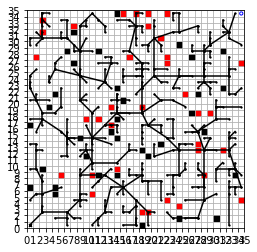

In [ ]:
n = 35 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
p1 = 0.9 # Transition probability
p2 = (1-p1)/(N_a-1)
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 2500 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 0.5 # Break when loss < tol
n_it = 10*n # Number of RRT iterations

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states
s0 = n**2 - n # Set start in the bottom left corner
i_v = np.array([n-1]) # Set goal in the top right corner
o_v,_,r_v,t_v = f_Random_Board(n,np.append(i_v,s0),n_i,n_o,n_r,n_t) # Random board

Vertex_list, Edge_list = f_RRT(s0,o_v,r_v,n,n_it=n_it,gr=5) # Run RRT

f_Plot_gopts(i_v,o_v,r_v,t_v,n) # Plot obstacles, etc
f_Plot_RRT(Edge_list,n) # Plot RRT graph
plt.show()

In [ ]:
# Get states that neighbor v_new
def f_get_neighbors(v_new,Vertex_list,n,radius,dmode):
  Sn = np.array([],'i') # Array of neighbor states
  # For every vertex:
  for i in np.arange(len(Vertex_list)):
    v = Vertex_list[i] # Get a vertex
    if v != v_new and f_Dist(v_new,v,dmode=dmode) <= radius: # If distance <= radius
      Sn = np.append(Sn,i) # Add vertex indices to array of neigbors
  return Sn

In [ ]:
v_new = 0
neighbor_idx = f_get_neighbors(v_new,Vertex_list,n,radius,dmode=2)
print(neighbor_idx)
Cost_list[neighbor_idx]
# cost_idx = np.argmin(Cost_list[neighbor_idx])
cost_idx
min_neighbor_idx = neighbor_idx[cost_idx]
Vertex_list[min_neighbor_idx]


[ 59  75  77  84  90 142 166 179 222 241]


37

In [ ]:
# Get minimum-cost neighbor of v_new, and its index
def f_get_min_cost_neighbor(v_new,Vertex_list,Cost_list,n,radius,dmode):
  neighbor_idx = f_get_neighbors(v_new,Vertex_list,n,radius,dmode=dmode) # Neighborhood of v_new
  cost_idx = np.argmin(Cost_list[neighbor_idx]) # Index of minimum-cost neighbor
  min_neighbor_idx = neighbor_idx[cost_idx] # Minimum-cost neighbor index
  min_neighbor = Vertex_list[min_neighbor_idx] # Minimum-cost neighbor
  return min_neighbor, min_neighbor_idx

In [ ]:
# # Builds a rapidly-exploring random tree rooted at s0
# def f_RRT_star(s0,o_v,r_v,n,n_it=50,gr=5):
#   counter = 0 # Counter
#   # Remove start state from list of new possible vertices:
#   Sv = np.setdiff1d(np.arange(N_s), s0)
#   Vertex_list = np.array([s0]) # List of vertices
#   Edge_list = np.array([]) # List of edges
#   Cost_list = np.array([0]) # List of vertex costs

#   while counter <= n_it:
#     v_new = np.random.choice(Sv) # Propose a new vertex at a random state from S
#     v_nearest, idx, d = f_Nearest(Vertex_list,v_new,dmode=1) # Get nearest vertex
#     # If distance greater than growth rate gr:
#     if d > gr:
#       # Get a feasible vertex at a distance of gr in the direction of v_new
#       v_new = f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d)
#       d = gr
#     # If v_new is not in an obstacle state:
#     if v_new not in o_v:
#       # Get minimum-cost neighbor of v_new:
#       min_neighbor, _ = f_get_min_cost_neighbor(v_new,Vertex_list,Cost_list,n,radius=gr)
#       Sv = np.setdiff1d(Sv, v_new) # Update possible states
#       # Add a new edge to the graph between v_new and min_neighbor:
#       new_edge = np.array([min_neighbor,v_new])
#       # Append the new vertex to Vertex_list:
#       Vertex_list = np.append(Vertex_list,v_new)
#       # Append the new edge to Edge_list:
#       Edge_list = np.append(Edge_list,new_edge)
#       # The cost of a vertex is the cost of its parents
#       # plus the cost of the edge between them.
#       new_cost = Cost_list[idx] + d
#       # Append the new cost to Cost_list:
#       Cost_list = np.append(Cost_list,new_cost)
#     counter += 1 # Increment the counter

#   # Reshape Edge_list to a matrix with 2 columns, for better readability:
#   Edge_list = np.reshape(Edge_list,(int(len(Edge_list)/2),2))

#   return Vertex_list, Edge_list, Cost_list

In [ ]:
# Get subset of x given by mask (an array of 0s and 1s)
def f_subset(mask,x):
  c = mask*x # Multiply by mask
  return c[c!=0] # Get nonzero entries

In [ ]:
# # Fake info:
# v_min = Vertex_list[10]
# new_cost = Cost_list[10] - 1
# Edge_list2 = np.copy(Edge_list)

# # def f_Rewire():

# neighbor_idx = f_get_neighbors(v_min,Vertex_list,n,radius) # Indices of neighbors of v_min
# neighbors = Vertex_list[neighbor_idx] # Neighbors of v_min
# costs = Cost_list[neighbor_idx] # Costs of neighbors of v_min
# potential_costs = np.zeros(len(neighbors)) # Costs of the neighbors if they were routed through v_min
# # For all neighbors:
# for i in np.arange(len(neighbors)):
#   v = neighbors[i] # Get a vertex
#   d_p = f_Dist(v_min,v,dmode=1) # Distance between v and v_min
#   potential_costs[i] = new_cost + d_p # New cost of v
# update = potential_costs < costs # Are the new costs less than the old costs?
# rewire_neighbors = f_subset(update,neighbors) # Vertices to rewire
# rewire_idx = f_subset(update,neighbor_idx) # Indices of vertices to rewire
# rewire_costs = f_subset(update,potential_costs) # Costs of vertices to rewire

# # If rewire_neighbors is not empty:
# if rewire_neighbors.size > 0:
#   # Remove old edges:
#   for v_rewire in rewire_neighbors:
#     w = np.where(Edge_list2==v_rewire)[0]
#     remove_idx = w[np.where(np.mod(w,2)==1)][0]
#     Edge_list2 = np.delete(Edge_list2, [remove_idx,remove_idx-1])
#   # Add new edges:
#   for v_rewire in rewire_neighbors:
#     rewire_edge = np.array([min_neighbor,v_rewire])
#     Edge_list2 = np.append(Edge_list2,rewire_edge)
#   # Update costs:
#   for i in np.arange(len(rewire_neighbors)):
#     Cost_list[rewire_idx[i]] = rewire_costs[i]

# # Don't add edges if they go through an obstacle
# # Fix the argmin error
# # Remember: Edge_list2 -> Edge_list

In [ ]:
# Rewire the RRT tree:
def f_Rewire(v_min,Vertex_list,Edge_list,Cost_list,new_cost,n,radius,dmode=2):
  neighbor_idx = f_get_neighbors(v_min,Vertex_list,n,radius,dmode=dmode) # Indices of neighbors of v_min
  neighbors = Vertex_list[neighbor_idx] # Neighbors of v_min
  costs = Cost_list[neighbor_idx] # Costs of neighbors of v_min
  potential_costs = np.zeros(len(neighbors)) # Costs of the neighbors if they were routed through v_min
  # For all neighbors:
  for i in np.arange(len(neighbors)):
    v = neighbors[i] # Get a vertex
    d_p = f_Dist(v_min,v,dmode=dmode) # Distance between v and v_min
    potential_costs[i] = new_cost + d_p # New cost of v
  update = potential_costs < costs # Are the new costs less than the old costs?
  rewire_neighbors = f_subset(update,neighbors) # Vertices to rewire
  rewire_idx = f_subset(update,neighbor_idx) # Indices of vertices to rewire
  rewire_costs = f_subset(update,potential_costs) # Costs of vertices to rewire

  # If rewire_neighbors is not empty:
  if rewire_neighbors.size > 0:
    # Remove old edges:
    for v_rewire in rewire_neighbors:
      w = np.where(Edge_list==v_rewire)[0] # Get entries of Edge_list that include v_rewire
      # Since we're dealing with a tree, each vertex has exactly one incoming edge
      # This means there is exactly one odd-valued index in w.
      remove_idx = w[np.where(np.mod(w,2)==1)][0] # Save this index to remove_idx
      Edge_list = np.delete(Edge_list, [remove_idx,remove_idx-1]) # Remove the edge entering v_rewire
    # Add new edges:
    for v_rewire in rewire_neighbors:
      rewire_edge = np.array([v_min,v_rewire]) # New edge between v_min and r_rewire
      Edge_list = np.append(Edge_list,rewire_edge) # Append to Edge_list
    # Update costs:
    for i in np.arange(len(rewire_neighbors)):
      Cost_list[rewire_idx[i]] = rewire_costs[i] # Update Cost_list with the rewired cost

  return Edge_list, Cost_list

In [ ]:
# # Fake info:
# v_min = Vertex_list[10]
# new_cost = Cost_list[10] - 1
# # Edge_list2 = np.copy(Edge_list)

# Edge_list2, Cost_list = f_Rewire(v_min,Vertex_list,Edge_list,Cost_list,n,radius)

# # Don't add edges if they go through an obstacle
# # Fix the argmin error
# # Remember: Edge_list2 -> Edge_list

In [ ]:
# Builds a rapidly-exploring random tree rooted at s0
def f_RRT_star(s0,o_v,r_v,n,n_it=50,gr=5,dmode=2):
  counter = 0 # Counter
  # Remove start state from list of new possible vertices:
  Sv = np.setdiff1d(np.arange(N_s), s0)
  Vertex_list = np.array([s0]) # List of vertices
  Edge_list = np.array([]) # List of edges
  Cost_list = np.array([0]) # List of vertex costs

  while counter <= n_it:
    v_new = np.random.choice(Sv) # Propose a new vertex at a random state from S
    v_nearest, idx, d = f_Nearest(Vertex_list,v_new,dmode=dmode) # Get nearest vertex
    # If distance greater than growth rate gr:
    if d > gr:
      # Get a feasible vertex at a distance of gr from v_nearest in the direction of v_proposal
      v_new = f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d)
      d = gr
    # If v_new is not in an obstacle state:
    if v_new not in o_v:
      # Get minimum-cost neighbor of v_new:
      v_min, _ = f_get_min_cost_neighbor(v_new,Vertex_list,Cost_list,n,radius=gr,dmode=dmode)

      # Update possible states:
      Sv = np.setdiff1d(Sv, v_new)
      # Add a new edge to the graph from v_min to v_new:
      new_edge = np.array([v_min,v_new])
      # Append the new vertex to Vertex_list:
      Vertex_list = np.append(Vertex_list,v_new)
      # Append the new edge to Edge_list:
      Edge_list = np.append(Edge_list,new_edge)
      # The cost of a vertex is the cost of its parents
      # plus the cost of the edge between them:
      new_cost = Cost_list[idx] + d
      # Append the new cost to Cost_list:
      Cost_list = np.append(Cost_list,new_cost)

      # Edge_list, Cost_list = f_Rewire(v_min,Vertex_list,Edge_list,Cost_list,new_cost,n,radius=gr,dmode=dmode)

    counter += 1 # Increment the counter

  # Reshape Edge_list to a matrix with 2 columns, for better readability:
  Edge_list = np.reshape(Edge_list,(int(len(Edge_list)/2),2))

  return Vertex_list, Edge_list, Cost_list

Test RRT*:

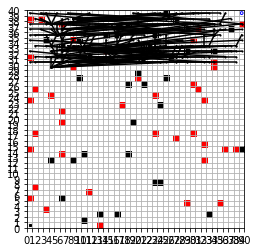

In [ ]:
n = 30 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
p1 = 0.9 # Transition probability
p2 = (1-p1)/(N_a-1)
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 2500 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 0.5 # Break when loss < tol
n_it = 10*n # Number of RRT iterations

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states
s0 = n**2 - n # Set start in the bottom left corner
i_v = np.array([n-1]) # Set goal in the top right corner
o_v,_,r_v,t_v = f_Random_Board(n,np.append(i_v,s0),n_i,n_o,n_r,n_t) # Random board

Vertex_list, Edge_list, Cost_list = f_RRT_star(s0,o_v,r_v,n,n_it=n_it,gr=5) # Run RRT

# Edge_list_r = np.reshape(Edge_list,(int(len(Edge_list)/2),2))
f_Plot_gopts(i_v,o_v,r_v,t_v,n) # Plot obstacles, etc
f_Plot_RRT(Edge_list_r,n) # Plot RRT graph
plt.show()

In [ ]:
Vertex_list

Algorithm: \
(1) Grow an RRT tree from your starting state to create new goal states. \
(2) Run RL from your starting state to each of the goal states to get a set of “frontier states.” (the leaves of the tree) \
(3) Run RL from the RRT frontier states to the final goal state. Note: the number of leaf states grows exponentially, so we would want to instead randomly sample from the leaf states. \
(4) If no RRT frontier states can find the final state: \
	Branch again, making new goals and using RL to make new frontier states.
(5) If any RRT frontier states can find the final state, we know we can find a path from the start to the end state.
Break the RRT loop. Suppose we have a collection of frontier states, all of which can reach the goal state. Each frontier state is connected back to the initial state via a single path in the tree. If it takes T1 steps under an intermediate goal and then T2 steps from this state to the final state, this path gets a reward of gamma^(T1+T2) * R, where R is the final reward and gamma is the discount factor. Thus, we can compute the reward for all the paths. \
(6) We want to reduce the number of intermediate goal nodes in the paths. To do this, see if RL can skip any nodes and remove these nodes. Repeat until we have a minimal number of nodes on each path. \
(7) We now select the best path using a genetic algorithm. Each path is a candidate sequence of intermediate goals. Add “mutated” versions of each path in which we perturb (and sometimes remove) the intermediate goal states. Select a subset of the population with the highest rewards and repeat. Break after some number of loops or when the paths converge. Select the best path. We now have a sequence of goals which lead us to the final goal.